# Read summary file of simulations and plot results

In [9]:
# import modules for ploting and data manipulation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [10]:
summ_file = "info_nofilt_infoc_test.csv"
exposure = 4331
# read csv file
df = pd.read_csv(summ_file)
print(df.head())

   simulation  flux[mcrab]  exposure[s]  filter  focus  Npixels  Nimpacts  \
0          26          0.5         4331  nofilt  infoc     1395    130201   
1          30          0.5         4331  nofilt  infoc     1386    130563   
2          29          0.5         4331  nofilt  infoc     1383    130163   
3          25          0.5         4331  nofilt  infoc     1390    129989   
4          28          0.5         4331  nofilt  infoc     1394    129592   

   Nrecons  Nbadrecons  fraction_lost[%]  fraction_badreconstructed[%]  
0   130132          66            0.0530                        0.0507  
1   130503          60            0.0460                        0.0460  
2   130109          53            0.0415                        0.0407  
3   129933          52            0.0431                        0.0400  
4   129521          71            0.0548                        0.0548  


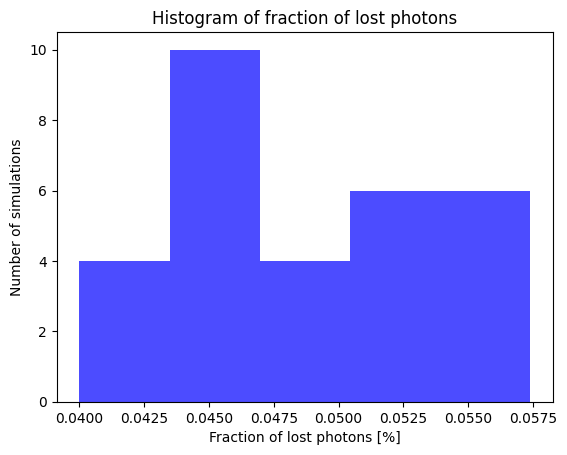

In [15]:
# Read columns "simulation" and "fraction[%lost]" for the given exposure time
df = df[df["exposure[s]"] == exposure]
sim = df["simulation"]
frac = df["fraction_lost[%]"]
# plot a histogram of the fraction of lost photons for each simulation
plt.hist(frac, bins=5, color="blue", alpha=0.7)
plt.xlabel("Fraction of lost photons [%]")
plt.ylabel("Number of simulations")
plt.title("Histogram of fraction of lost photons")
plt.show()

In [16]:
mean_frac = np.mean(frac)
std_frac = np.std(frac)
print("Mean fraction of lost photons: ", mean_frac)
print("Standard deviation of fraction of lost photons: ", std_frac)


Mean fraction of lost photons:  0.048646666666666664
Standard deviation of fraction of lost photons:  0.004786350964519376


In [17]:
square = std_frac**2
print("Variance of fraction of lost photons: ", square)


Variance of fraction of lost photons:  2.290915555555556e-05


In [18]:
# do a normality test
from scipy.stats import shapiro
stat, p = shapiro(frac)
print("Shapiro-Wilk test statistic: ", stat)
print("Shapiro-Wilk test p-value: ", p)


Shapiro-Wilk test statistic:  0.9543182976523774
Shapiro-Wilk test p-value:  0.2203181805503578


In [19]:
#do a Kolmogorov-Smirnov test for normality
from scipy.stats import kstest
stat, p = kstest(frac, "norm")
print("Kolmogorov-Smirnov test statistic: ", stat)
print("Kolmogorov-Smirnov test p-value: ", p)


Kolmogorov-Smirnov test statistic:  0.5159534368528308
Kolmogorov-Smirnov test p-value:  6.038236993799787e-08


In [22]:
# do an anderson-darling test for normality
from scipy.stats import anderson
result = anderson(frac)
print("Anderson-Darling test statistic: ", result.statistic)
print("Anderson-Darling test critical values: ", result.critical_values)
print("Anderson-Darling test significance levels: ", result.significance_level)
print("Anderson-Darling test p-value: ", result.significance_level[2])
# print a conclusion about normality
if result.statistic < result.critical_values[2]:
    print("The fraction of lost photons is normally distributed")


Anderson-Darling test statistic:  0.5039129594055929
Anderson-Darling test critical values:  [0.521 0.593 0.712 0.83  0.988]
Anderson-Darling test significance levels:  [15.  10.   5.   2.5  1. ]
Anderson-Darling test p-value:  5.0
The fraction of lost photons is normally distributed
